# Introduction to PCA

Principal Component Analysis (PCA) is a dimension reduction technique that was first formulated by [Karl Pearson already in 1901](https://zenodo.org/record/1430636#.X0yqxNMzbdc). In this introduction, we will walk through the underlying theory of PCA, show how to run it in R, and interpret the results. We will work with small data sets throughout, where we can interpret the variables and make individual plots. 

## Preparation

We start by loading some R packages that we will use later on for plotting. If you are not familiar with these packages, that's not a problem; all necessary code will be provided.

In [39]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(pheatmap)
    library(ggrepel)
    library(ggcorrplot)
    library(dplyr)
    library(tibble)
})

In addition, we take a first look at the data set we will be using (`mtcars`). This is a built-in data set in R, which contains data on fuel consumption and aspects of design and performance for 32 types of cars (1973-1974 models).

In [11]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


We can get more information about the variables by typing `?mtcars`, which tells us what the different columns mean: 

Format:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon
       [, 2]  cyl   Number of cylinders
       [, 3]  disp  Displacement (cu.in.)
       [, 4]  hp    Gross horsepower
       [, 5]  drat  Rear axle ratio
       [, 6]  wt    Weight (1000 lbs)
       [, 7]  qsec  1/4 mile time
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)
       [, 9]  am    Transmission (0 = automatic, 1 = manual)
       [,10]  gear  Number of forward gears
       [,11]  carb  Number of carburetors

For later reference, we'll also plot the correlations among the variables.

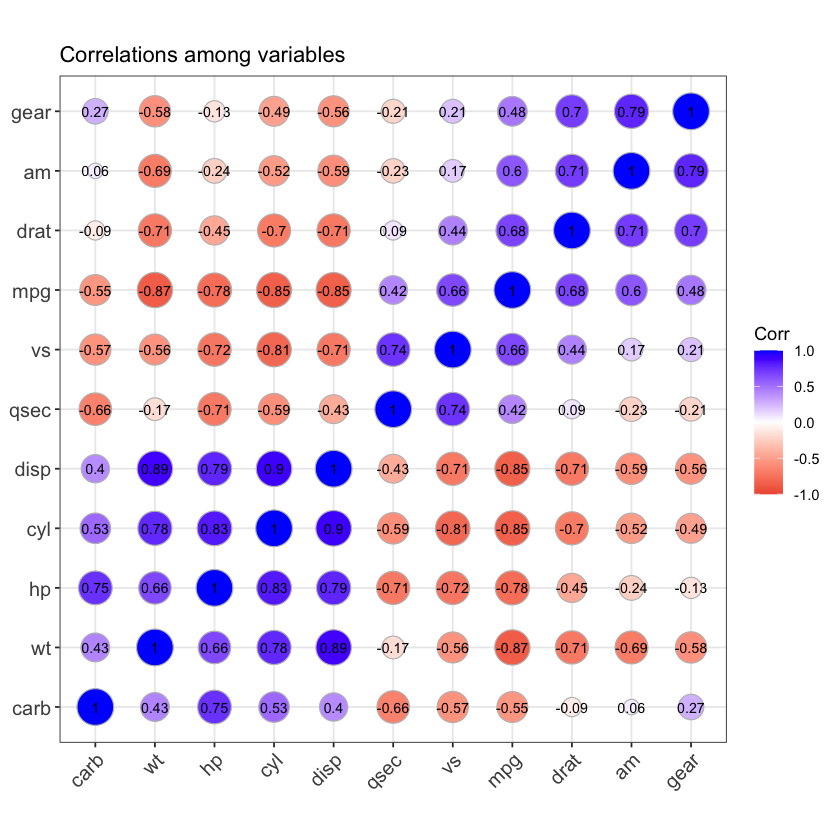

In [12]:
ggcorrplot(round(cor(mtcars),3), 
           hc.order = TRUE, 
           lab = TRUE, 
           lab_size = 3, 
           method = "circle", 
           colors = c("tomato2", "white", "blue"), 
           title = "Correlations among variables", 
           ggtheme = theme_bw)

We note that there seem to be two groups of variables, which show a positive correlation within each group and a negative correlation with variables from the other group. One group consists of the number of cylinders, the number of carburators, the weight, the horsepower and the displacement. The other group consists of the number of gears, the transmission type, the rear axle ratio, the miles per gallon, the engine type and the time to go 1/4 mile. 

## Why dimension reduction?

TODO...
Say something about projections

## The singular value decomposition (SVD)

Before showing how to perform a PCA on the `mtcars` data, we will look into the theoretical underpinnings a bit. First, we'll talk about the _singular value decomposition_. This is an important mathematical result, which states that _every_ real-valued $m\times n$ matrix $M$ can be _decomposed_ as $$M=UDV^T,$$ where $U$ is an $m\times r$ orthogonal matrix (a matrix where each pair of columns are orthogonal, and the sum of the squared values in each column is equal to 1), $V$ is an $n\times r$ orthogonal matrix ($^T$ represents the transpose of a matrix) and $D$ is a non-negative $r\times r$ diagonal matrix. Here, $r$ denotes the _rank_ of the matrix, which corresponds to the number of non-zero values in the diagonal of $D$. In fact, the decomposition exists also for complex-valued matrices, but we'll stay with the real-valued ones for this introduction. In this decomposition, the columns of $U$ and $V$ are called the left and right singular vectors, respectively, and the diagonal elements of $D$ are called the singular values. It is also worth noting that if all the singular values are unique, and we follow the convention of ordering them in decreasing order, the decomposition is uniquely determined (possibly up to the sign of the singular vectors). 

To see how this works in practice, let's apply it to the `mtcars` matrix above. In R, the singular value decomposition can be calculated using the `svd()` function. 

In [13]:
svdres <- svd(as.matrix(mtcars))

In [14]:
str(svdres)

List of 3
 $ d: num [1:11] 1726.66 227.64 88.25 11.92 5.64 ...
 $ u: num [1:32, 1:11] -0.1132 -0.1132 -0.0825 -0.1616 -0.2313 ...
 $ v: num [1:11, 1:11] -0.0519 -0.0206 -0.8523 -0.5172 -0.0101 ...


We indeed get the expected three components ($U$, $V$, $D$) in the output. Let's first check that the $U$ and $V$ matrices are orthogonal. This can be done my calculating the dot product (scalar product) between each pair of columns. If the matrix is orthogonal, this product should be 1 if a column is multiplied with itself, and 0 otherwise. Practically, we can achieve this by performing a matrix multiplication between the transpose of the matrix and the matrix itself. The diagonal elements in the resulting matrix correspond to multiplication of a column by itself, and the off-diagonal elements correspond to multiplication of different columns. 

In [18]:
round(t(svdres$u) %*% svdres$u, 3)

1,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,1


In [19]:
round(t(svdres$v) %*% svdres$v, 3)

1,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,1


Just as we expected! We also confirm that the values in $D$ are all non-negative and ordered in decreasing order of magnitude (note that since we know that $D$ is a diagonal matrix, only the diagonal values are given here - to turn it into a matrix we can use the `diag()` function):

In [20]:
svdres$d

[1] 1726.658651  227.637939   88.246069   11.918884    5.640189    4.209141
 [7]    2.581988    1.622713    1.402483    1.173273    1.105263

Finally, we have to confirm that we have actually decomposed our original matrix! In other words, performing the matrix multiplication $UDV^T$ should return our original matrix.

In [22]:
mtcars_rec <- svdres$u %*% diag(svdres$d) %*% t(svdres$v)
max(abs(mtcars_rec - mtcars))

[1] 2.842171e-13

Success!

Now that we have seen that we can decompose our matrix using the SVD (I promise you, it will work for any other matrix as well), let's see how this is related to PCA. In fact, it is very straightforward: given a matrix $M$ with samples in the rows and variables in the columns, we define the _principal components_ as the columns of $V$. Let's see what happens if we project our original data matrix $M$ onto these components (which would be achieved by matrix multiplication of $M$ and $V$: since $V$ is an orthogonal matrix, we get $$MV=UDV^TV=UD.$$ In other words, the projections of the original samples onto a new orthogonal basis defined by the principal components are given by the columns of $UD$.

Let's take a step back and look at what we have achieved: we have _decomposed_ $M$, using the SVD, into $$M=(UD)V^T,$$where $V$ contains the principal components and $UD$ contains the projections of each original point onto these principal components. But what is this all good for - remember that what we are after is to reduce the dimensionality of the data, while in some sense keeping as much information as possible. The answer lies in the _Eckart-Young_ theorem: 

__Eckart-Young theorem__: Let M be a real $N\times p$ matrix with rank r, and let $s\leq r$. Then the optimal rank-s approximation to $M$ (minimizing the Frobenius norm of the difference) is given by $$M_s=U_sD_sV_s^T,$$ where $U_s$ and $V_s$ are matrices containing the first $s$ left and right singular vectors of $M$, respectively, and $D_s$ is a diagonal matrix containing the first $s$ singular values. The error in the approximation is given by $$\|M-M_s\|_F^2=\sum_{k=s+1}^rd_k^2.$$

In other words, performing the SVD and keeping only the first $s$ columns of the respective matrices gives us the _best_ $s$-dimensional approximation of our original matrix, which was exactly what we were after! Note also that by choosing $s=r$, we get back our original matrix, as we saw previously. 

Let's try what we just saw in practice. Given our `mtcars` matrix $M$, we approximate it with the first 6 singular vectors, and calculate the error. 

In [26]:
mtcars_svd <- svd(as.matrix(mtcars))
mtcars_s6 <- mtcars_svd$u[, 1:6] %*% diag(mtcars_svd$d[1:6]) %*% t(mtcars_svd$v[, 1:6])
dim(mtcars_s6) ## same as mtcars

[1] 32 11

In [28]:
sum((mtcars - mtcars_s6)^2)

[1] 13.865

In [29]:
sum(mtcars_svd$d[7:11]^2)

[1] 13.865

As expected, the error in the approximation is exactly given by the sum of the squares of the non-included singular values!

To recap, at this point we have a decomposition of the original matrix, which is such that if we select a pre-defined number of components from it, we get the best approximation of the original matrix of that rank, and where we can interpret $UD$ as the projection of the original matrix onto the orthogonal columns of $V$. Sounds pretty good! But it doesn't stop there. Let's make one more assumption, namely that the columns of our original matrix are centered (in other words, that the mean of each variable is 0). In that case, we can prove that the projection onto the first $s$ right singular vectors is also the rank-$s$ projection with maximal _variance_. In other words, if we consider variance a good measure of "information", the first $s$ principal components provides the most informative rank-$s$ representation of our data! We can easily get the variance explained by each component as the square of the corresponding singular value. 

In fact, we can also prove that the projecting the data onto the first principal components is optimal in the sense of preserving distances, that is, minimizing $$\sum_{j,k=1}^n\delta_{jk}^2-\hat{\delta}_{jk}^2$$where $\delta$ and $\hat{\delta}$ are Euclidean distances in the original and low-dimensional space, respectively. 

## Running PCA in R

Hopefully the derivations above have convinced you that projecting data onto the first principal components can be a sensible way of reducing the dimensionality while retaining as much as possible of the 'information' (=variance) in the original data, or, alternatively, to approximate the original data as well as possible in a lower-dimensional space. Now, we will see how to run the PCA in R. We can of course do it with the `svd()` function as described above, but R has also other functions that perform a bit more of the legwork for us. The one we are going to use here is `prcomp()`, which is provided in base R. Internally, it makes use of the SVD, which can be efficiently and robustly computed. This makes it numerically preferable to the `princomp()` function (also in base R), which uses an eigendecomposition to find the principal components. 

__Important!__ When applying `prcomp()` to your data, make sure that you have the __samples in the rows__, and the variables in the columns! This is counter to most of the omics data, but keep in mind that `prcomp()` was written before omics data, during the time when data sets typically had more samples than variables, in which case this was the typical way of representing the data matrix. 

Let's start by looking at the arguments of `prcomp()`:

In [1]:
pca <- prcomp(mtcars, scale. = TRUE)

In [2]:
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.5707 1.6280 0.79196 0.51923 0.47271 0.46000 0.3678
Proportion of Variance 0.6008 0.2409 0.05702 0.02451 0.02031 0.01924 0.0123
Cumulative Proportion  0.6008 0.8417 0.89873 0.92324 0.94356 0.96279 0.9751
                           PC8    PC9    PC10   PC11
Standard deviation     0.35057 0.2776 0.22811 0.1485
Proportion of Variance 0.01117 0.0070 0.00473 0.0020
Cumulative Proportion  0.98626 0.9933 0.99800 1.0000

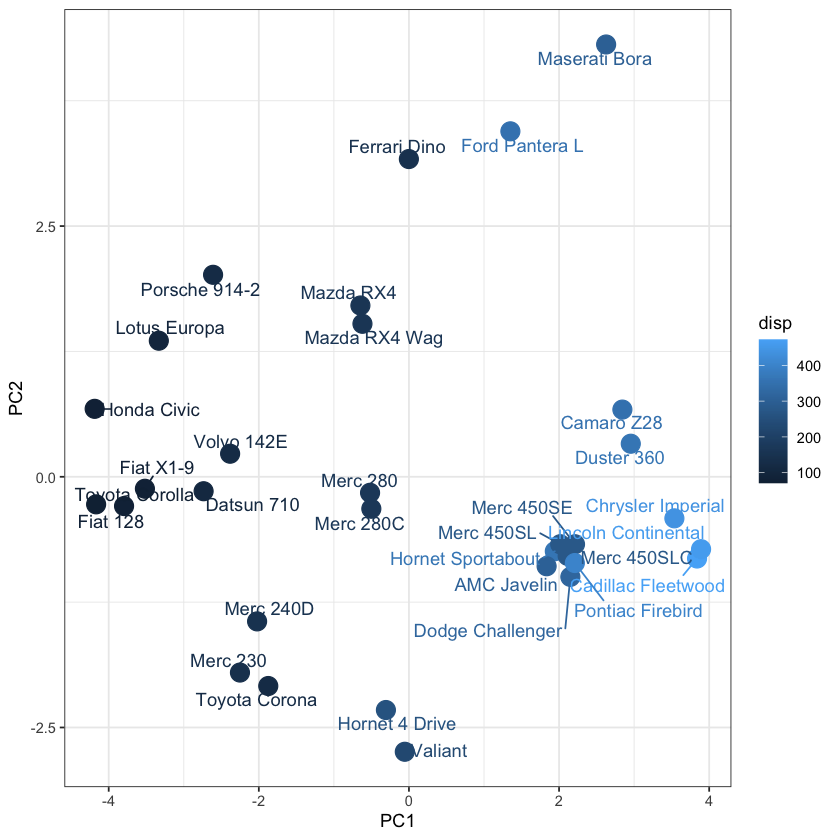

In [41]:
ggplot(cbind(data.frame(pca$x) %>% tibble::rownames_to_column("model"), mtcars), 
       aes(x = PC1, y = PC2, color = disp, label = model)) + 
geom_point(size = 5) + 
theme_bw() + 
geom_text_repel()

In [35]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
mpg,-0.3625305,0.01612440,-0.22574419,-0.022540255,0.10284468,-0.10879743,0.367723810,-0.754091423,0.235701617,0.13928524,-0.124895628
cyl,0.3739160,0.04374371,-0.17531118,-0.002591838,0.05848381,0.16855369,0.057277736,-0.230824925,0.054035270,-0.84641949,-0.140695441
disp,0.3681852,-0.04932413,-0.06148414,0.256607885,0.39399530,-0.33616451,0.214303077,0.001142134,0.198427848,0.04937979,0.660606481
hp,0.3300569,0.24878402,0.14001476,-0.067676157,0.54004744,0.07143563,-0.001495989,-0.222358441,-0.575830072,0.24782351,-0.256492062
drat,-0.2941514,0.27469408,0.16118879,0.854828743,0.07732727,0.24449705,0.021119857,0.032193501,-0.046901228,-0.10149369,-0.039530246
wt,0.3461033,-0.14303825,0.34181851,0.245899314,-0.07502912,-0.46493964,-0.020668302,-0.008571929,0.359498251,0.09439426,-0.567448697
qsec,-0.2004563,-0.46337482,0.40316904,0.068076532,-0.16466591,-0.33048032,0.050010522,-0.231840021,-0.528377185,-0.27067295,0.181361780
vs,-0.3065113,-0.23164699,0.42881517,-0.214848616,0.59953955,0.19401702,-0.265780836,0.025935128,0.358582624,-0.15903909,0.008414634
am,-0.2349429,0.42941765,-0.20576657,-0.030462908,0.08978128,-0.57081745,-0.587305101,-0.059746952,-0.047403982,-0.17778541,0.029823537
gear,-0.2069162,0.46234863,0.28977993,-0.264690521,0.04832960,-0.24356284,0.605097617,0.336150240,-0.001735039,-0.21382515,-0.053507085


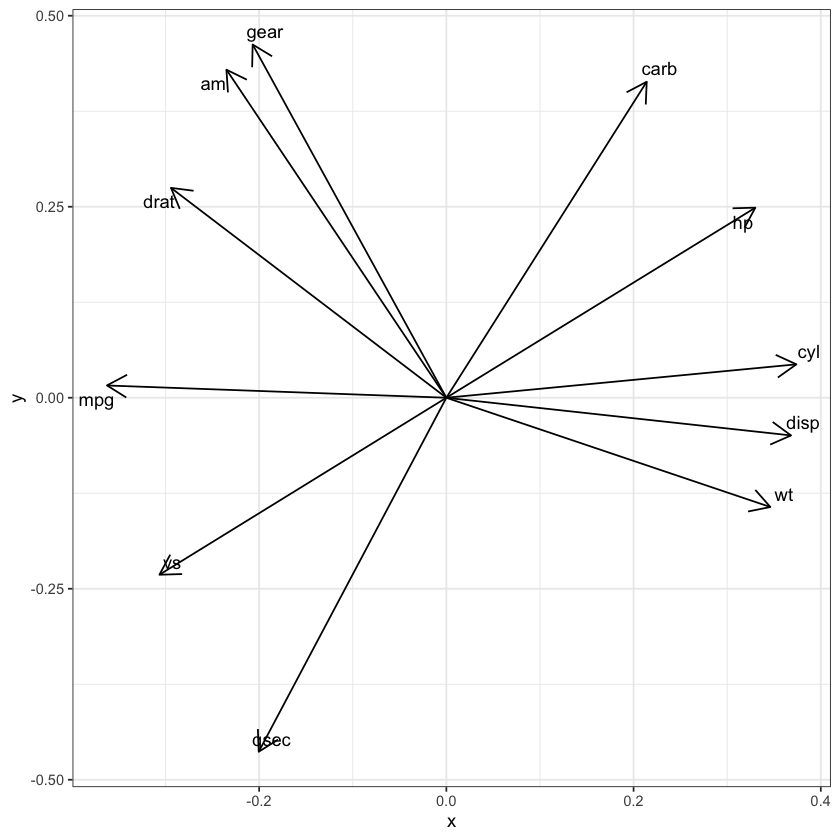

In [44]:
ggplot(data.frame(pca$rotation) %>% tibble::rownames_to_column("feature")) + 
geom_segment(aes(xend = PC1, yend = PC2, x = 0, y = 0),
            arrow = arrow(length = unit(0.03, "npc"))) + 
theme_bw() + 
geom_text_repel(aes(x = PC1, y = PC2, label = feature))

## TODO
* approximate PCA, irlba, rsvd etc
* scree plot, selecting the number of components
* variable scaling or not
* biplots, loading interpretation (correlated variables close to each other, dot product gives approximate original value), relate to correlogram
* Illustrate the Frobenius norm in a 2d example -> PCA is not linear regression
* Mention other linear techniques (LDA, PLS, CCA)
* sign of PCs is arbitrary
* shortcomings - linearity, global optimality, assumes Euclidean distances are the ones to be approximated, difficult to interpret if there are lots of variables (->sparse PCA)
* consider fixed aspect ratio, indicate fraction explained variance
* other uses of PCA - principal component regression, getting uncorrelated features (PCs are not only orthogonal, but also uncorrelated)

## References